**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE Y MATRÍCULA: 
    * A01746998 - Alexys Martin Coate Reyes                            
    * Jonathan Levi Marquez García
    * Anrulfo Alejandro Cavazos Villareal

In [46]:
#from google.colab import drive
#drive.mount('/content/drive')

In [47]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
#os.chdir(DIR)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [49]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [50]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [51]:
cars_df_clean = cars_df.drop(columns=["id","VIN","url","image_url","description","posting_date","lat","long"])
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [52]:
num_reg, num_cols = cars_df_clean.shape
print("Num. Registros totales:", num_reg)
print("Num. Columnas totales:", num_cols)

Num. Registros totales: 426880
Num. Columnas totales: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


#### **Respuesta**

Num Columnas eliminadas: 6

Columnas a eliminadas: ['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county'] 

In [53]:
# Calculando el porcentaje de valores faltantes
perc_missing_values = (cars_df_clean.isna().mean()*100).to_frame()
perc_missing_values.columns = ["Porcentaje de valores faltantes"]
display(perc_missing_values)

# Agrupando las columnas a borrar (Faltan 30% de los datos en la columna)
columnas_a_eliminar = perc_missing_values[perc_missing_values["Porcentaje de valores faltantes"] > 30]
columnas_a_eliminar = columnas_a_eliminar.index.to_list()

# Eliminando valores con 30% valores faltantes
cars_df_clean_2 = cars_df_clean.dropna(axis=1, thresh=len(cars_df_clean)*0.7)
cars_df_clean_2.info()

print("\n\nNum Columnas eliminadas:", len(columnas_a_eliminar))
print("Columnas a eliminadas:", columnas_a_eliminar,"\n")

,Porcentaje de valores faltantes
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


Num Columnas eliminadas: 6
Columnas a eliminadas: ['condition', 'cylinders', 'drive', 'size', 'paint_color', 'county'] 



In [54]:
"""
# Borrando las columnas
car_df_clean_2 = cars_df_clean.drop(columns=columnas_a_eliminar)
car_df_clean_2.info()
"""

'\n# Borrando las columnas\ncar_df_clean_2 = cars_df_clean.drop(columns=columnas_a_eliminar)\ncar_df_clean_2.info()\n'

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [55]:
# Agrupando las columnas con menos del 5% de valores faltantes
cols_ms5 = perc_missing_values[perc_missing_values["Porcentaje de valores faltantes"] < 5]
print(cols_ms5)
cols_ms5 = cols_ms5.index.to_list()

print("\n\nNum Columnas con menos del 5% de valores faltantes:", len(cols_ms5))
print("Columnas con menos del 5% de valores faltantes:", cols_ms5,"\n")

# Eliminando registros con valores nulos de columnas con menos del 5% de los datos faltantes
cars_df_clean_3 = cars_df_clean_2.dropna(axis=0,subset=cols_ms5)
cars_df_clean_3.info()

# Calculando porcentaje de registros eliminados
perc_reg_eliminados = (1 - (len(cars_df_clean_3)/len(cars_df_clean_2))) * 100
print("% Registros eliminados:", perc_reg_eliminados)

              Porcentaje de valores faltantes
region                               0.000000
region_url                           0.000000
price                                0.000000
year                                 0.282281
manufacturer                         4.133714
model                                1.236179
fuel                                 0.705819
odometer                             1.030735
title_status                         1.930753
transmission                         0.598763
state                                0.000000


Num Columnas con menos del 5% de valores faltantes: 11
Columnas con menos del 5% de valores faltantes: ['region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'state'] 

<class 'pandas.core.frame.DataFrame'>
Index: 389604 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region       

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [56]:
# Verificando que columnas tienen valores nulos
cars_df_clean_3.isna().mean()*100

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.208201
state            0.000000
dtype: float64

In [57]:
from sklearn.impute import SimpleImputer

# Reemplazando valores en los registros con información nula
imputer = SimpleImputer(strategy='constant')
cars_df_full = imputer.fit_transform(cars_df_clean_3)   # Output: numpy.ndarray

# Transformado nuevamente a datafrmae
df = pd.DataFrame(cars_df_full,columns=cars_df_clean_3.columns)
df

,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state
0,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al
1,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al
2,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al
3,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al
4,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al
...,...,...,...,...,...,...,...,...,...,...,...,...
389599,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy
389600,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy
389601,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy
389602,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy


In [58]:
# Verificando que ya no hay valores nulos
df.isna().mean()

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
dtype: float64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

In [59]:
# Transformando columnas numericas a tipo numeric
numeric_columns = ["price","year","odometer"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389604 entries, 0 to 389603
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389604 non-null  object 
 1   region_url    389604 non-null  object 
 2   price         389604 non-null  int64  
 3   year          389604 non-null  float64
 4   manufacturer  389604 non-null  object 
 5   model         389604 non-null  object 
 6   fuel          389604 non-null  object 
 7   odometer      389604 non-null  float64
 8   title_status  389604 non-null  object 
 9   transmission  389604 non-null  object 
 10  type          389604 non-null  object 
 11  state         389604 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 35.7+ MB


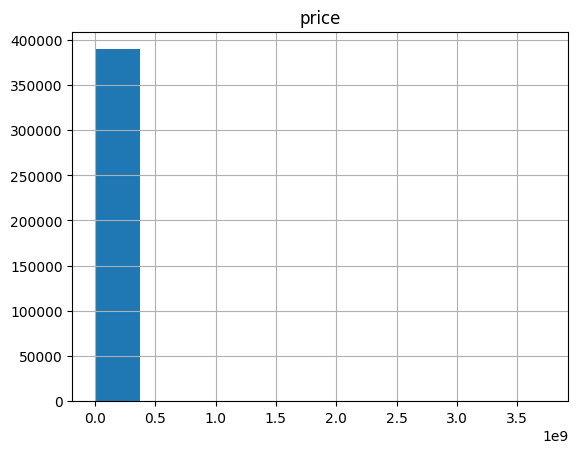

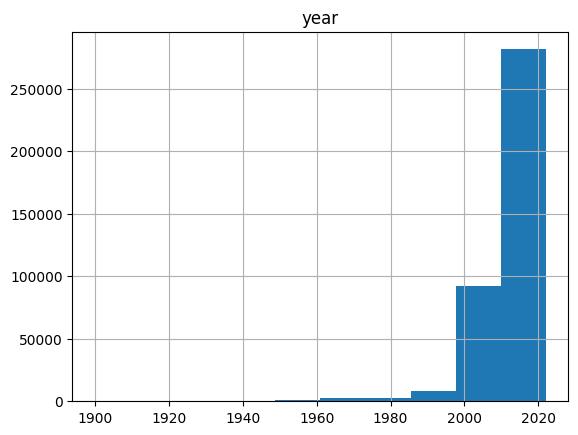

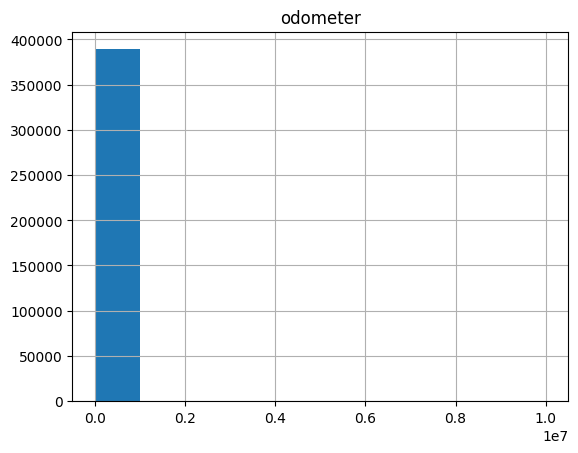

In [60]:
# Graficando columnas numéricas
for col in numeric_columns:
    df.hist(col)

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [61]:
# Agregando columna de age al dataframe
df["age"] = 2024 - df["year"]

# Eliminando columna "year"
df_2 = df.drop(columns="year")
df_2

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389599,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,5.0
389600,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,4.0
389601,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,4.0
389602,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,6.0


4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

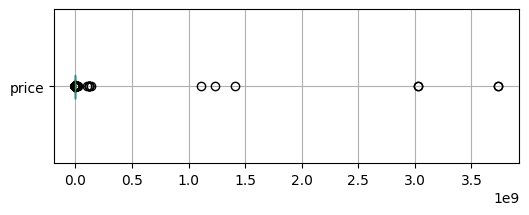

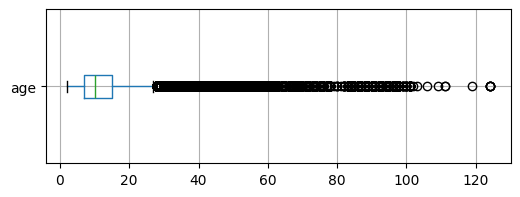

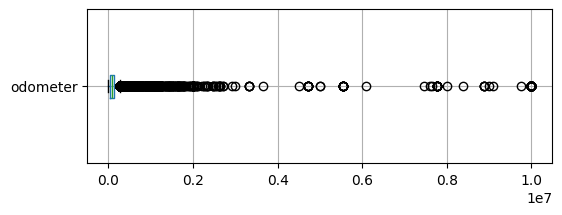

In [62]:
numeric_columns = ["price","age","odometer"]
for col in numeric_columns:
    df_2.boxplot(col,figsize=(6,2),vert=False)
    plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [63]:
df_filtered = df_2.copy()

numeric_columns = ["price","age","odometer"]

for col in numeric_columns:
    
    # Calculando límites para outliers
    IQR = df_2[col].quantile(0.75) - df_2[col].quantile(0.25)
    lower_limit = df_2[col].quantile(0.25) - (IQR * 1.5)
    upper_limit = df_2[col].quantile(0.75) + (IQR * 1.5)
    
    # Filtrando los registros (sin outliers)
    df_filtered = df_filtered[(df_filtered[col] >= lower_limit) & (df_filtered[col] <= upper_limit)]

display(df_filtered)

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
0,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,10.0
1,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,14.0
2,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,4.0
3,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,7.0
4,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389599,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,5.0
389600,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,4.0
389601,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,4.0
389602,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,6.0


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

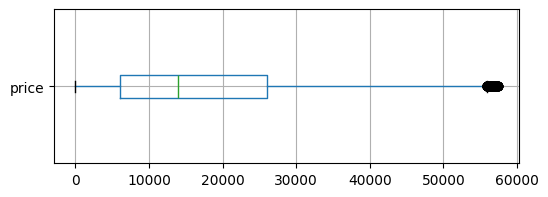

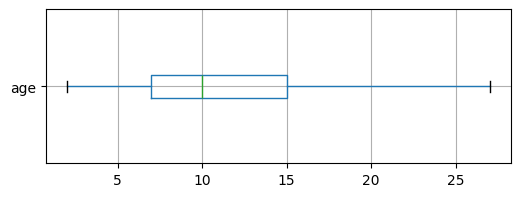

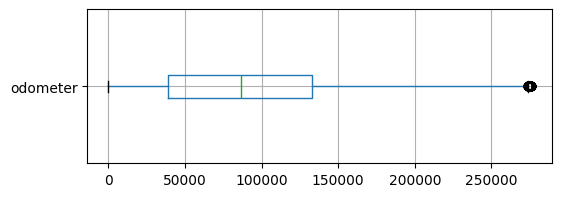

In [64]:
numeric_columns = ["price","age","odometer"]
for col in numeric_columns:
    df_filtered.boxplot(col,figsize=(6,2),vert=False)
    plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


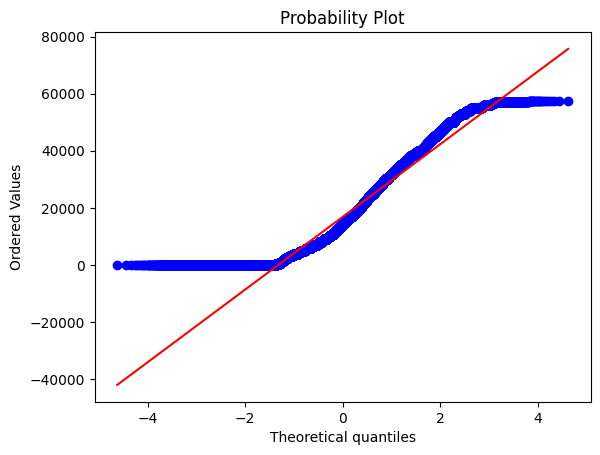

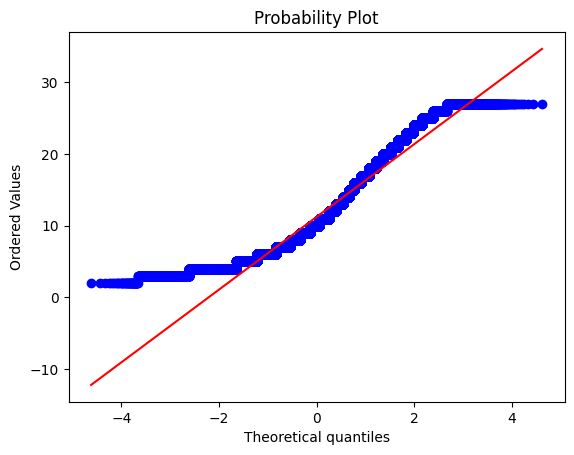

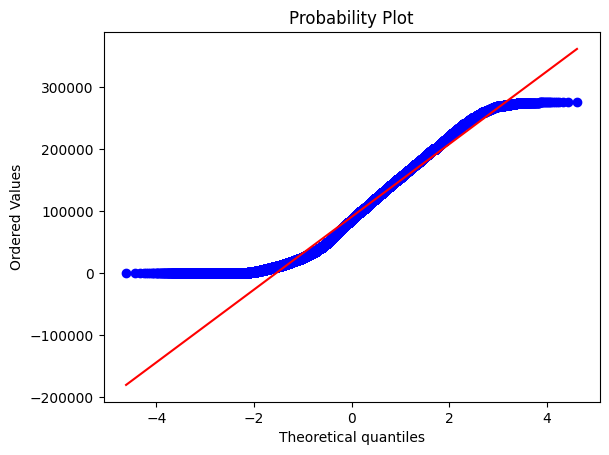

In [65]:
import scipy.stats as stats

for col in numeric_columns:
    stats.probplot(df_filtered[col], dist="norm", plot=plt)

    plt.show()
    
#plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [66]:
from sklearn.preprocessing import PowerTransformer

#Obteniendo data frame de las variables numéricas
df_num = df_filtered.select_dtypes(include="number")

transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformed_data = transformer.fit_transform(df_num)
transf_df = pd.DataFrame(transformed_data, columns=transformer.get_feature_names_out())
transf_df

,price,odometer,age
0,194.933364,623.675987,2.472590
1,164.326657,695.994731,2.803571
2,209.204110,346.526341,1.642861
3,188.293578,519.996769,2.135461
4,137.708592,949.705360,2.565181
...,...,...,...
366323,167.423035,456.840699,1.833249
366324,187.243996,270.474616,1.642861
366325,198.386565,153.705344,1.642861
366326,182.964760,440.666821,1.994910


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

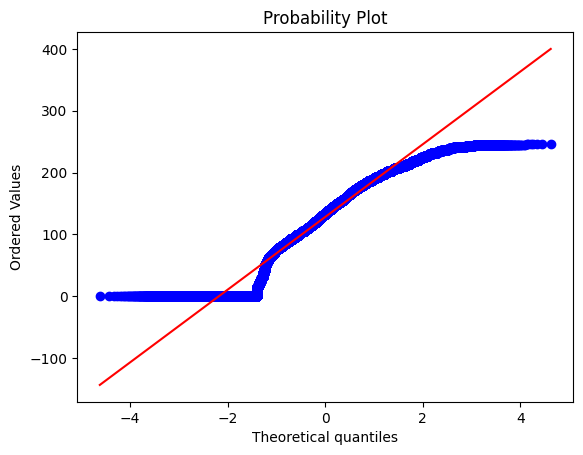

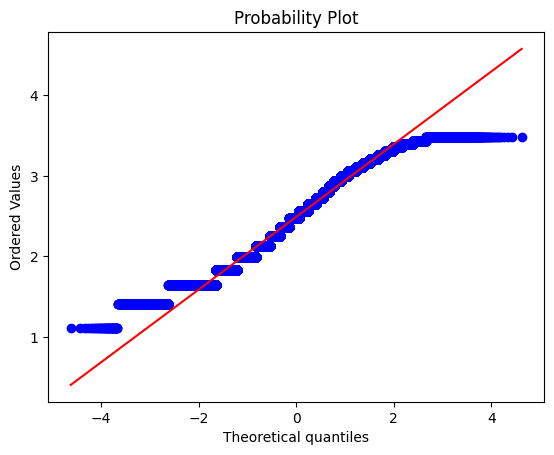

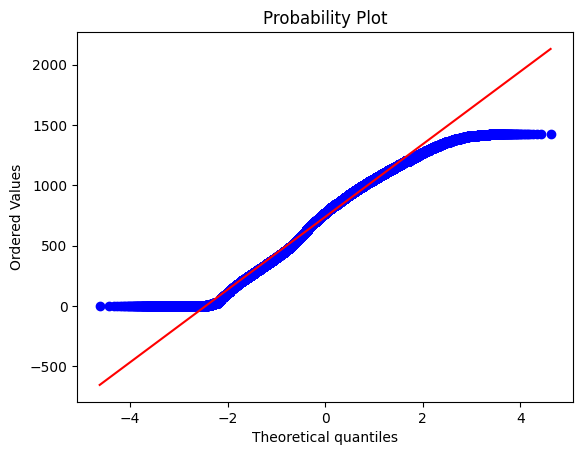

In [67]:
for col in numeric_columns:
    stats.probplot(transf_df[col], dist="norm", plot=plt)
    plt.show()
#plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(transf_df)
minmax_df = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())
minmax_df

,price,odometer,age
0,0.794060,0.437060,0.574773
1,0.669384,0.487739,0.714813
2,0.852192,0.242839,0.223713
3,0.767013,0.364403,0.432133
4,0.560956,0.665534,0.613949
...,...,...,...
366323,0.681997,0.320145,0.304266
366324,0.762738,0.189543,0.223713
366325,0.808127,0.107714,0.223713
366326,0.745306,0.308810,0.372666


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'odometer'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

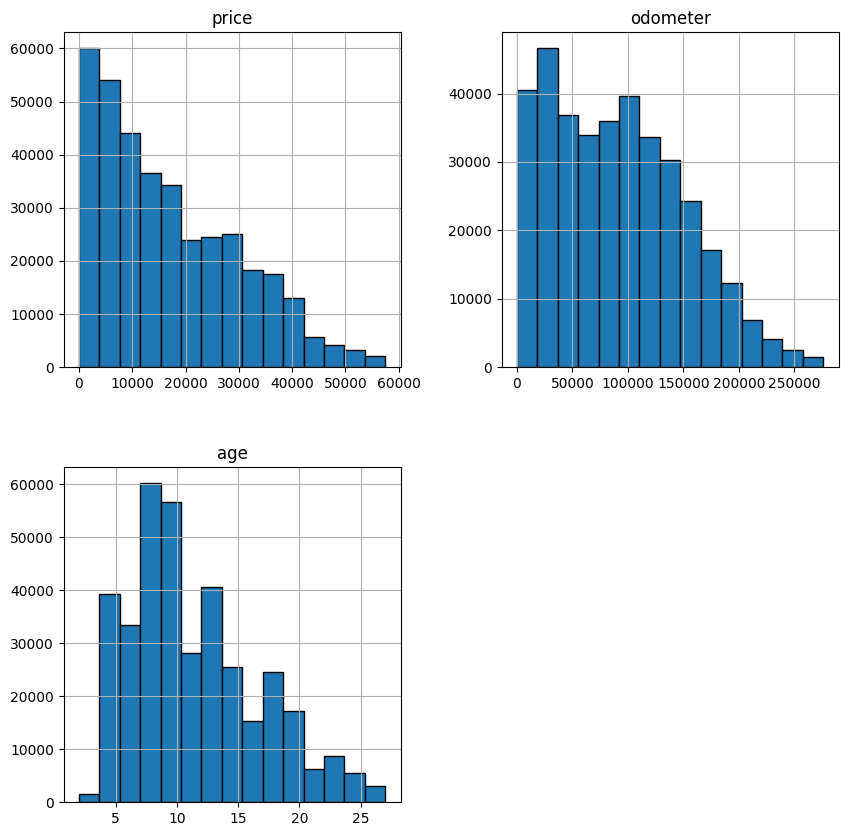

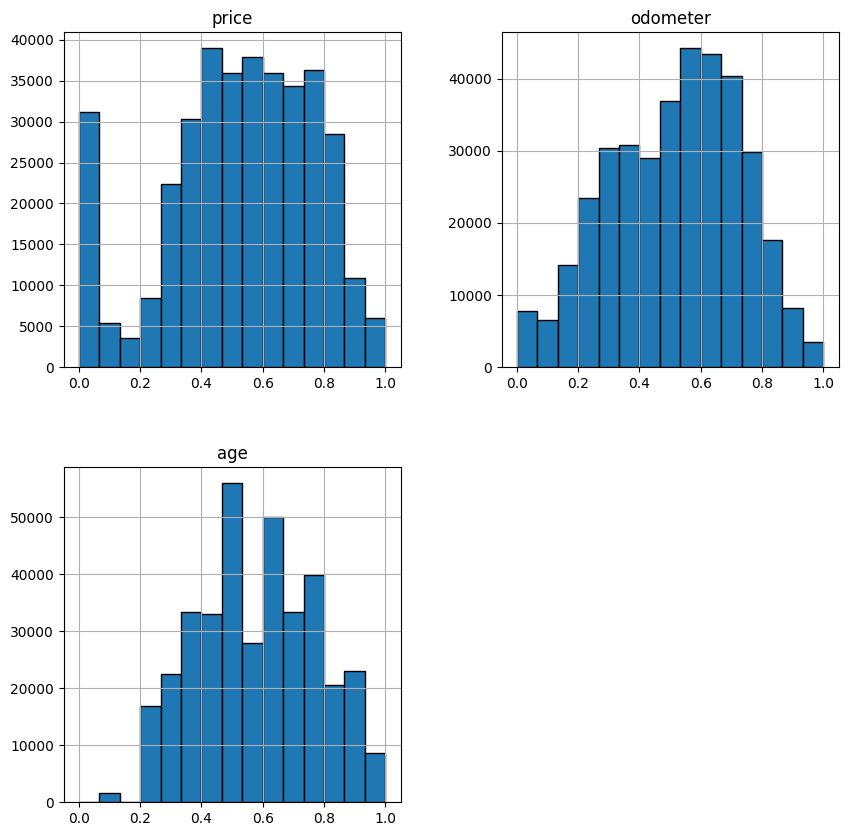

In [69]:
df_filtered.hist(["price","odometer","age"],figsize=(10,10), bins=15, edgecolor="black")
minmax_df.hist(figsize=(10,10), bins=15, edgecolor="black")

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [70]:
# Separando variables categóricas
df_cat = df_filtered.select_dtypes(exclude="number")
df_cat.describe()

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,366328,366328,366328,366328,366328,366328,366328,366328,366328
unique,404,413,40,19097,5,6,3,14,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3188,2737,61660,7436,312085,354717,291628,79350,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [71]:
# Obteniendo variabels con alta y baja cardinalidad colocandolas en una lista
unique_values = df_cat.describe().loc["unique"]
highly_cardinal_variables = unique_values[unique_values > 100].index.tolist()
few_cardinal_variables = unique_values[unique_values <= 100].index.tolist()
print("highly_cardinal_variables:",highly_cardinal_variables)
print("few_cardinal_variables:",few_cardinal_variables)

highly_cardinal_variables: ['region', 'region_url', 'model']
few_cardinal_variables: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

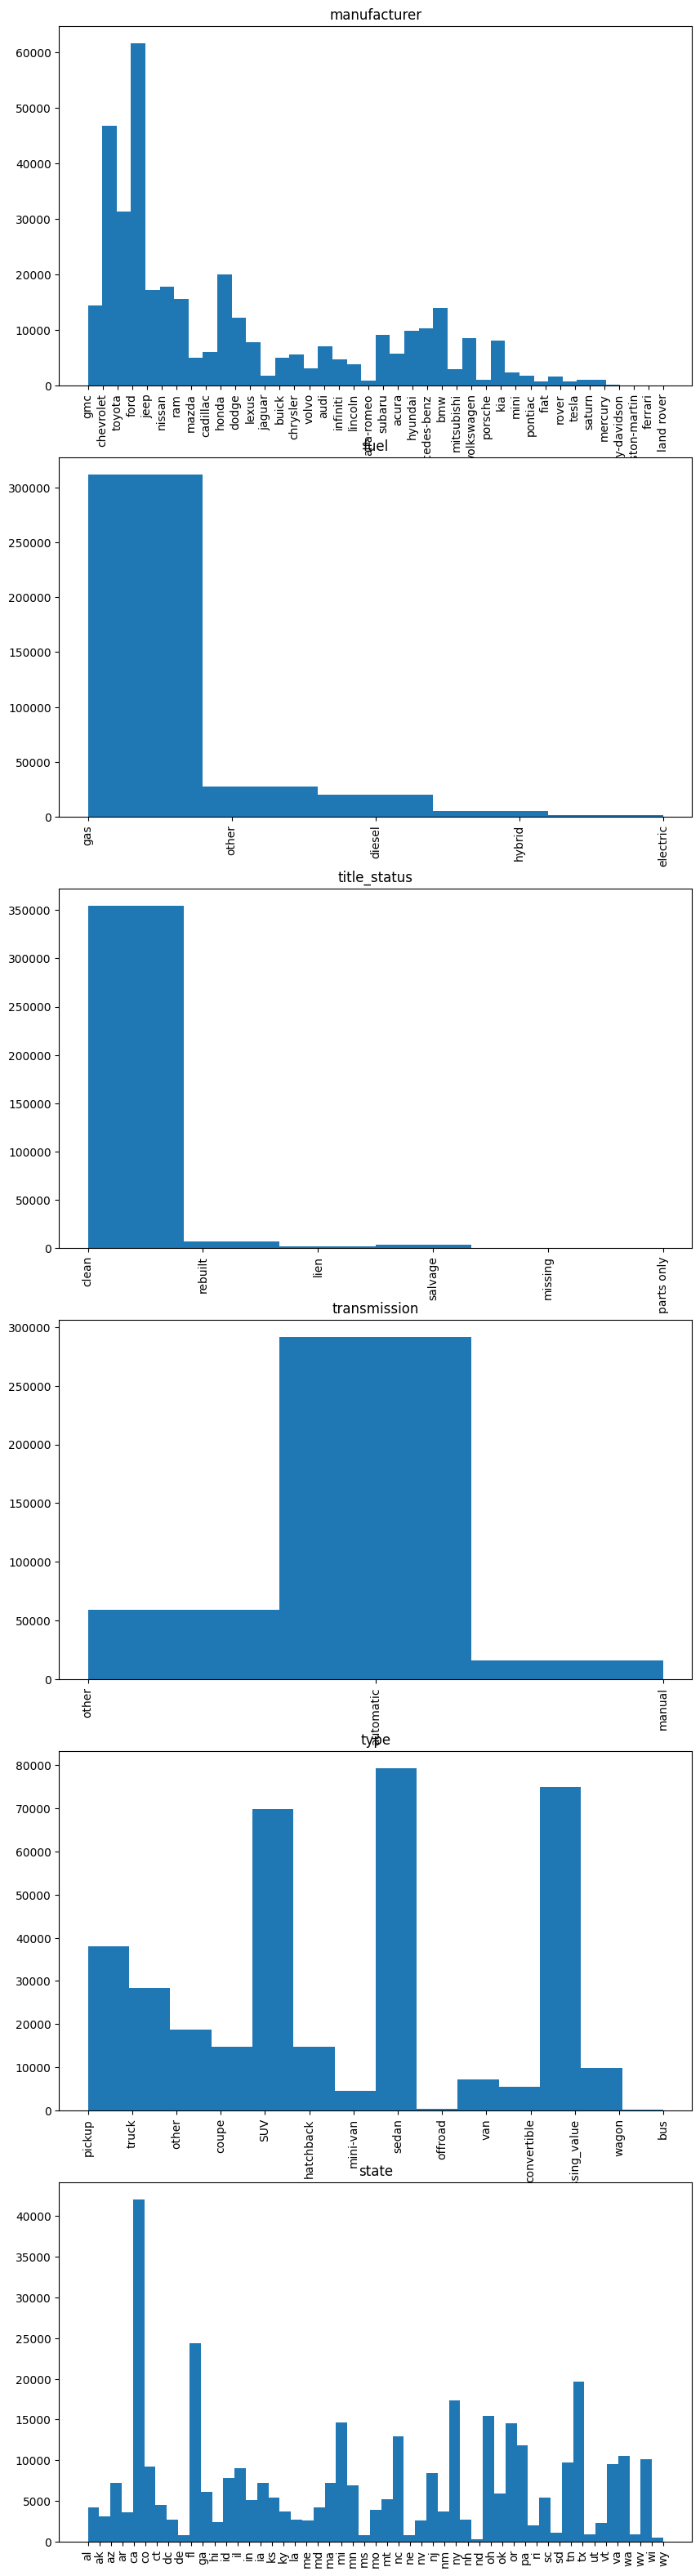

In [72]:
# Colocando ambas variables en data frames
df_few_cat = df_cat[few_cardinal_variables]
df_few_cat_1 = ['fuel', 'title_status', 'transmission', 'type']
df_high_cat = df_cat[highly_cardinal_variables]

fig, axes = plt.subplots(6,1, figsize=(10,40))
axes = axes.ravel()

for col, ax in zip(df_few_cat, axes):
    ax.hist(df_few_cat[col], bins=df_few_cat[col].nunique())
    ax.set_xticks(df_few_cat[col].unique())
    ax.tick_params(axis='x',rotation=90)
    ax.set(title=f'{col}', xlabel=None)
    
# Ajustar el diseño
#plt.tight_layout()
#plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [73]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_few_cat)
column_names = encoder.get_feature_names_out(df_few_cat.columns)
onehot_df = pd.DataFrame(encoded_data, columns=column_names)
onehot_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [74]:
from category_encoders.binary import BinaryEncoder

encoder = BinaryEncoder()
encoded_data = encoder.fit_transform(df_high_cat)
binary_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389599,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
389600,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
389601,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
389602,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [75]:
df_final = pd.concat([minmax_df,onehot_df,binary_df], axis=1)
df_final

,price,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.437060,0.574773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.669384,0.487739,0.714813,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.852192,0.242839,0.223713,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.767013,0.364403,0.432133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.560956,0.665534,0.613949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
389600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
389601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
389602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
